# Вычислительная математика
## 1.4 Взвешенный МНК. Погрешности весов. Матричные разложения

Содержание семинара:

- __Матричные разложения__
    - SVD
    - Спектральное разложение
    - LU-разложение (Разложение Холецкого)
        - Пример - решение СЛАУ через LU
        - Пример - решение МНК через Холецкого
- __Погрешности данных и весов__
    - Вероятностная формулировка ошибки
    - Систематическая погрешность
    - Случайная погрешность. Правдоподобие.
    - Визуализация доверительного интервала.

- __Домашнее задание__

## Матричные разложения

В данном курсе нам часто будут встречаться различные матричные разложения. Перечислим основные из них с некоторыми примерами использования.

### Сингулярное разложение (SVD)

![original image](https://cdn.mathpix.com/snip/images/hT4mrYdCdSarZLNfsyODsPifVaxqorpPD2r530AsbFU.original.fullsize.png)



- $r=\operatorname{rank}(A)$
  
- $U, V$ - унитарные ($U^{*}U=E$)
  
- $\sigma_1 \geq \ldots \geq \sigma_r>0$ - ненулевые _сингулярные_ числа. Для эрмитовых матриц равны модулям собственных чисел.

- Столбцы $U, V$ - _сингулярные_ векторы. Столбцы $U$ обычно называют левыми сингулярными векторами, а $V$ - правыми.

- Существует всегда. В отличие от жордановой формы, для SVD существуют устойчивые алгоритмы вычисления.
  
Note: SVD также может быть определена для  $U \in \mathbb{C}^{m \times p}$, $\Sigma \in \mathbb{R}^{p \times p}$ и $V \in \mathbb{C}^{n \times p}, p=\min \{n . m\}$

### Алгоритмы построения

- Спектральное разложение $A A^*$ или $A^* A$ совпадает с сингулярным разложением (собственное разложение). Собственные числа этих матриц равны квадратам сингулярных чисел матрицы $A$, собственные вектора первой матрицы равны левым сингулярным векторам матрицы $A$, второй матрицы - правым (проверьте самостоятельно).

- Стабильный алгоритм $\mathcal{O}\left(m n^2\right)$ , $(m>n):$

>1. Bidiagonalize $A$ by Householder reflections
>
>$$
A=U_1 B V_1^*
$$
>
>2. Find SVD of $B=U_2 \Sigma V_2^*$ by spectral decomposition of $T$ ( 2 options).
>
>3. $U=U_1 U_2, \quad V=V_1 V_2$

### Области применения

- Сжатие данных

- Эффективное вычисление псевдообратной матрицы

- Определение ключевых признаков в Data Science

### Спектральное разложение

![original image](https://cdn.mathpix.com/snip/images/wHlmYBemge8HfuQqISNBZMEiL0K4KGhjAILp6tJ-csU.original.fullsize.png)


- $\lambda_1, \ldots, \lambda_n$ - собственные числа.
  
- Столбцы $S$ - собственные вектора.

- Не всегда существует (в отличие от верхнетреугольного вида)

- Совпадает с сингулярным разложением тогда и только тогда, когда матрица A - симметричная и положительно определённая (собственные числа являются неотрицательными). В таком случае собственные и сингулярные числа и векторы - одно и то же.

- Существует тогда и только тогда, когда матрица подобна диагональной. Это значит также, что тогда и только тогда, когда жорданова форма матрицы А является диагональной (нет присоединённых векторов).

### Алгоритмы построения

- Если $A=A^*$, Jacobi method: $\mathcal{O}\left(n^3\right)$

- Если $A A^*=A^* A$, QR algorithm: $\mathcal{O}\left(n^3\right)$

- Если $A A^* \neq A^* A$ ассимптотика также $\mathcal{O}\left(n^3\right)$

### Области применения

- Полное спектральное разложение используется редко, т.к. для вычисления необходимы все собственные вектора.

- Для вычисления собственных чисел лучше использовать верхнетреугольную форму (существует алгоритм за  $\mathcal{O}\left(n^3\right)$)

### LU-разложение (Разложение Холецкого)

![original image](https://cdn.mathpix.com/snip/images/gRXBxyUaz9_3aO5NcA6Hc459tjNNNX70N_g20c8pZBw.original.fullsize.png)



- Существует только при ненулевых лидирующих (то есть угловых) минорах.

- Уникально (если на диагонали матрицы L сделать единицы).


>__Если__ матрица $A$ - __симметрична__ и __положительно определена__, LU-разложение можно модифицировать в __разложение Холецкого__:
> <img src="https://cdn.mathpix.com/snip/images/BnowSPBTuy0B1CJiOrivAflIp8yDC6VIXK6NRID4H0k.original.fullsize.png" width="425" height="425" />

### Алгоритмы построения

- Different versions of Gaussian elimination, $\mathcal{O}\left(n^3\right)$ flops. In LU for stability use permutation of rows or columns (LUP).

- $\mathcal{O}\left(n^3\right)$ can be decreased for sparse matrices by appropriate permutations, e.g.
  - minimum degree ordering
  - Cuthill-Mckee algorithm

- Banded matrix with bandwidth $b$

  ![original image](https://cdn.mathpix.com/snip/images/dsH46H6rFYZetCeAC_syK3GulV7oTBY9lhuWFw6SbzQ.original.fullsize.png)

can be decomposed using $\mathcal{O}\left(n b^2\right)$ flops.

### Области применения

LU и более высокоуровневые модификации LDL, Холецкий используются для

- Решения СЛАУ. Пусть $A=L U$, тогда сложность решения $A x=b$ есть $\mathcal{O}\left(n^2\right)$ :

  1. Решим простую систему: $L y=b$
  
  2. Решим обратную систему: $U x=y$


- Обращения матриц

- Вычисления детерминанта
  
- Как часть других разложений.

### Пример 1 - решить СЛАУ с помощью LU-разложения

Пусть СЛАУ:

$$
Ax=b
$$

Тогда хотим:

$$
Ax = LUx = b
$$

Для чего последовательно решаем:

$$
Ly=b
$$

$$
Ux=y
$$

Будем использовать следующие обозначения для элементов матриц: $A=\left(a_{i j}\right), L=\left(l_{i j}\right), U=\left(u_{i j}\right), i, j=1 \ldots n$; причём диагональные элементы матрицы $L: l_{i i}=1, i=1 \ldots n$.

Найти матрицы $L$ и $U$ можно следующим образом (выполнять шаги следует строго по порядку, так как следующие элементы находятся с использованием предыдущих):

>1. Цикл і от 1 до n
>    1. Цикл ј от 1 до $\mathrm{n}$
>        1. $u_{i j}=0, l_{i j}=0$
>        2. $l_{i i}=1$
>2. Цикл і от 1 до $\mathrm{n}$
>    1. Цикл ј от 1 до $\mathrm{n}$
>        1. Если $i \leq j: u_{i j}=a_{i j}-\sum_{k=1}^{i-1} l_{i k} \cdot u_{k j}$
>        2. Если $i>j: l_{i j}=\left(a_{i j}-\sum_{k=1}^{j-1} l_{i k} \cdot u_{k j}\right) / u_{j j}$

В итоге мы получим матрицы - $L$ и $U$.

In [1]:
import numpy as np

def lu_decomposition(A):
    n = A.shape[0]
    U = np.zeros((n, n))
    L = np.eye(n)

    for i in range(n):
        U[i, i:] = A[i, i:] - L[i, :i] @ U[:i, i:]
        L[i+1:, i] = (A[i+1:, i] - L[i+1:, :i] @ U[:i, i]) / U[i, i]

    return L, U

A = np.array([[1, 7, 3], [4, 5, 6], [7, 8, 9.]])

L, U = lu_decomposition(A)

A - L @ U

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.77635684e-15,  0.00000000e+00]])

In [2]:
b = np.array([1., 2., 3.]) # столбец свободных членов

# Решение Ly = b

y = b*0

for i in range(L.shape[0]):
    y[i] = b[i] - L[i, :i] @ y[:i]

# Решение Ux = y

x = b*0

for i in range(U.shape[0]-1, -1, -1):
    x[i] = (y[i] - U[i, i+1:] @ x[i+1:])/U[i, i]

# Проверка

x - np.linalg.inv(A) @ b

array([ 1.11022302e-16, -8.32667268e-17,  1.66533454e-16])

### Пример 2 - решение МНК через Холецкого

Вспомним что для заданной матрицы объекты-признаки $X$ наилучшие веса в MSE находились по формуле:

$$
\mathbf{w} = (X^\top X)^{-1} \cdot X^\top \cdot \mathbf{y}
$$

Что эквивалентно решению системы:

$$
(X^\top X) \cdot \mathbf{w} =  X^\top \cdot \mathbf{y}
$$

$$
A \cdot \mathbf{w} = \mathbf{b}
$$

С симметричной положительно определенной матрицей $A=(X^\top X)$ и столбцом свободных членов $\mathbf{b} = X^\top \cdot \mathbf{y}$. Намечается расзложение Холецкого, для тех кто не понял :).

Его плюс в данном случае - скорость выполнения (т.к. нам не нужно явно считать обратную).


In [3]:
import numpy as np
# ! pip install numba
# from numba import njit

def cholesky_solve(A, b):
    L = np.linalg.cholesky(A)

    # Решение Ly = b
    y = np.zeros_like(b)
    for i in range(L.shape[0]):
        y[i] = (b[i] - L[i, :i] @ y[:i])/L[i, i]

    # Решение L.T x = y
    x = np.zeros_like(b)
    for i in range(L.shape[1]-1, -1, -1):
        x[i] = (y[i] - L[i+1:, i] @ x[i+1:])/L[i, i]

    return x

A = np.array([[1, 7, 3], [4, 5, 6], [7, 8, 9.]])

try:
    L = np.linalg.cholesky(A) # Только для положительно определенных!
except Exception as error:
    print(error)

Matrix is not positive definite


In [4]:
# Фит многочленами с прошлого семинара

import numpy as np

# Генерируем выборку для исследования

x = 2*np.random.random(200000).reshape((-1, 1)) - 1
noise = 0.1*np.random.normal(size = x.shape)
y_label = -4 + 3*x - 2*x**2 + 5*x**3 + noise

# Напишем функцию для создания матрицы объекты-признаки
def create_X(x, m):
    X = np.ones(x.shape) # Сразу же добавим intercept
    for i in range(1, m + 1):
        X = np.concatenate([X, x**i], axis = 1)
    return X

X = create_X(x, 5)
A = X.T @ X

L = np.linalg.cholesky(A)

L @ L.T - A

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.84217094e-14,  0.00000000e+00, -2.84217094e-14],
       [ 0.00000000e+00,  1.45519152e-11,  0.00000000e+00,
         0.00000000e+00, -2.84217094e-14,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.84217094e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.84217094e-14,  0.00000000e+00,
         0.00000000e+00,  3.63797881e-12,  0.00000000e+00],
       [-2.84217094e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [5]:
%%time
w_pinv = np.linalg.inv(A) @ X.T @ y_label # Вычисление обратной O(n^3)

CPU times: user 114 ms, sys: 62.7 ms, total: 177 ms
Wall time: 30 ms


In [6]:
%%time
w_chol = cholesky_solve(A, X.T @ y_label) # А решение СЛАУ за O(n^2)

CPU times: user 32.3 ms, sys: 160 μs, total: 32.5 ms
Wall time: 5.32 ms


In [7]:
w_chol - w_pinv

array([[-3.81916720e-14],
       [ 1.14130927e-13],
       [ 2.58681965e-13],
       [-6.51034782e-13],
       [-2.89291594e-13],
       [ 5.33507266e-13]])

## Погрешности данных и весов
### Вероятностная формулировка ошибки

Мы уже узнали, что данные практически никогда не бывают "чистыми" - всегда будет какая-то доля ошибки (погрешность) в исходной выборке для регрессии $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$. Хотим как-то описать эту ситуацию на языке математики.

Самым естественным способом видется описание элемента выборки как случайной величины с какой-то плотностью распределения $(x_i, y_i) \sim P(x, y)$. Т.е. для всей выборки с учётом предположения о независимости отдельных точек:

$$
P\left(x_1, \ldots, x_N, y_1, \ldots, y_N\right)=\prod_{i=1}^N P\left(x_i, y_i\right)
$$

Таким образом мы можем учесть __случайную__ погрешность, объясняющую несовпадение нашей модели и исходных данных. В частности, это может выглядеть следующим образом в предположении (гипотезе) о том, что наша модель верно описывает исходную зависимость:

$$
y_i=X_{i \alpha} \mathrm{w}_\alpha+\epsilon_i, \quad \epsilon_i \sim  \mathcal{N}\left(0, \sigma^2\right)
$$

Здесь $\epsilon_i$ - это случайный гауссов шум, объясняющий, почему исходные точки не лежат точно на нашей модели. Отметим, что $\sigma$ нам неизвестна, но одинакова для всех точек выборки (хотя это может быть и не так).

Также ещё есть __систематическая__ погрешность данных (она, как правило, описывается крестами ошибок). Даже если все ваши точки идеально легли на модель (нулевая случайная погрешность), сами точки были измерены с какой-то точностью, что также внесёт свой вклад в погрешность весов модели.

$$
\widetilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)
$$

Наша цель - понять вклад обоих видов погрешностей данных в итоговую погрешность весов модели.

### Учёт систематической погрешности

Воспользуемся процедурой __усреднения по ансамблю приборов__. Наши данные $(x_i, y_i)$ знаем с какой-то точностью, обусловленной "прибором", который их измеряет/хранит/воводит. Если бы мы взяли эти данные из другого "прибора", значения бы поменялись на какую-то одинаковую величину (систематическую погрешность данных). Для простоты, рассмотрим только $y_i$, т.е. систематическую погрешность $x_i$ примем за ноль. Максимально абстрагируясь, __истинные данные для описания - случайные величины на вероятностном пространстве приборов__:

$$
\widetilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)
$$

где мы приняли наши имеющиеся данные за среднее, а саму зависимость положили гауссовой со дисперсией $s^2$.

Иными словами, плотность распределения истинных игреков равна:

$$
p\left(\tilde{y}_i\right)=\frac{1}{\sqrt{2 \pi s^2}} \exp \left(-\frac{\left(\tilde{y}_i-y_i\right)^2}{2 s^2}\right)
$$

А тогда плотность распределения всей выборки (то есть "всех N игреков") в случае их __независимости__ (т.е. случайные величины $\tilde{y}_i$ независимы между собой):

$$
P(\tilde{\mathbf{y}})=\prod_{i=1}^l p\left[\tilde{y}_i\right]
$$

где мы просто перемножили все вероятности.

А в случае их __зависимости__ (скоррелированности разных точек из выборки между собой = недиагональная ковариационная матрица):

$$
P(\tilde{\mathbf{y}})= \frac{1}{(2 \pi)^{N / 2}  (\operatorname{det} (A))^{1/2} } \exp \left(-\frac{(\tilde{\mathbf{y}}-\mathbf{y})^T  A^{-1}  (\tilde{\mathbf{y}}-\mathbf{y})}{2}\right)
$$

$$
\text{cov} \left( \tilde{y}_i \tilde{y}_j \right) \stackrel{\text{def}}{=} \left\langle\tilde{y}_i \tilde{y}_j\right\rangle = A_{ij}
$$

где $A$ - матрица ковариации точек выборки. Напоминаем, что мы рассматриваем в этом пункте только __систематическую__ погрешность.

Хотим получить погрешность весов. Для этого нужно взять корень из дисперсии $\tilde{\mathbf{w}}_i$ - случайных величин, получающихся по уже знакомой формуле:

$$
\tilde{\mathbf{w}}=\underbrace{\left(X^{\top} X\right)^{-1} X^{\top}}_Q \cdot \mathbf{y}
$$

$$
\tilde{\mathrm{w}}_\alpha=Q_{\alpha k} \cdot \mathbf{y}_k
$$

А тогда их дисперсия буквально зависит от корреляторов игреков, которые мы уже знаем (__нет суммирования по $\alpha$__):

$$
\sigma_{\mathrm{w}_\alpha}^2\stackrel{\text{def}}{=}\left\langle\tilde{\mathrm{w}}_\alpha \tilde{\mathrm{w}}_\alpha\right\rangle=Q_{\alpha i} \cdot Q_{\alpha j} \cdot \left\langle\tilde{y}_i \tilde{y}_j\right\rangle = \left(QA Q^{\top}\right)_{\alpha \alpha}
$$

В случае __диагональной__ A (независимые признаки с разными дисперсиями $s_i^2$) с учётом $QQ^\top = \left(X^{\top} X\right)^{-1}$:

$$
\sigma_{\mathrm{w}_\alpha}^2 = \left(X^{\top} X\right)^{-1}_{\alpha \alpha} \cdot s_i^2
$$

Ну и в случае __скалярной__ A  (независимые признаки с одинаковой дисперсией $s^2$):

$$
\sigma_{\mathrm{w}_\alpha}^2 = \left(X^{\top} X\right)^{-1}_{\alpha \alpha} \cdot s^2
$$

Скалярная матрица - это диагональная с равными диагональными элементами.

>Итого, __систематическая погрешность весов при одинаковой систематической ошибке__:

>$$
\Delta_{\text{сист}} \mathrm{w}_\alpha=\sqrt{\left(X^{T} X\right)^{-1}_{ \alpha \alpha }\cdot  s^2}
$$

__Примечание.__ Выше нигде нет суммирования по $\alpha$! Просто берём диагональный элемент.

### Учёт случайной погрешности

__Гауссова вероятностная модель__

Пусть нам дан набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$ и пусть их систематическая (приборная) погрешность равна нулю. Опять-таки надо найти наилучшую аппроксимирующую модель.

Как и раньше, будем решать эту задачу линейной регрессией. Объясним несовпадение истинных данных $y_i$ и наших предсказаний  $\check{y}_i$ некоторым случайным шумом

$$
y_i=X_{i \alpha} \mathrm{w}_\alpha+\epsilon_i, \quad \epsilon_i \sim  \mathcal{N}\left(0, \sigma^2\right)
$$

Здесь $\epsilon_i$ - это случайный гауссов шум, объясняющий, почему исходные точки не лежат точно на нашей модели. Отметим, что $\sigma$ нам неизвестна, но предполагаем её одинаковость для всех точек выборки.

 __Принцип максимизации правдоподобия (likelyhood)__

В отличие от эмпирически выбранной функции потерь, будем пользоваться __принципом максимизации правдоподобия (likelyhood)__. Он заключается в максимизации вероятности пронаблюдать истинные $y_i$ в нашей нашей вероятностной модели (при условии, что выполнена гипотеза истинности модели для фиттируемых данных).

>Иными словами, нам надо подобрать такие $\mathbf{w}$, чтобы вероятность $P_\mathbf{w}(\mathbf{y})$ нашей модели $\check{y}_i=X_{i \alpha} \mathrm{w}_\alpha$ с учётом шума $\epsilon_i$ выдать истинные $y_i$ была максимальной. При этом выборка фиксирована. Эта вероятность называется __правдоподобием данных__.

$$P_\mathbf{w}(\mathbf{y}) \rightarrow \max _\mathbf{w}$$

Т.к. вероятность независимых событий есть произведение их вероятностей, суммарная вероятность будет большим произведением, что не очень удобно. Поэтому переходят к эквивалентной задаче, беря логарифм от этой вероятности (это эквивалентный шаг, т.к. максимизация $\log P_\mathbf{w}(\mathbf{y})$ равносильна максимизации $P_\mathbf{w}(\mathbf{y})$). Для удобства, эту штуку также называют __правдоподобием__.

$$\log P_\mathbf{w}(y) $$

Распишем подробнее,

$$
P_\mathbf{w}(\mathbf{y})=\prod_{i=1}^N \mathcal{N}\left(0, \sigma^2\right)\left[\epsilon_i\right]=\prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{\left(y_i-X_{i \alpha} \mathrm{w}_\alpha\right)^2}{2 \sigma^2}\right)
$$

Логарифмируем,

$$
\log P_\mathbf{w}(\mathbf{y})=\sum_{i=1}^N\left\{-\frac{1}{2} \log 2 \pi \sigma^2-\frac{\left(y_i-X_{i\alpha} \mathrm{w}_\alpha\right)^2}{2 \sigma^2}\right\} \rightarrow \max _\mathbf{w}
$$

Заметим, что первые слагаемые от $\mathbf{w}$ не зависят, а вторые слагаемые в этой сумме образуют сумму квадратов отклонений, т.е. они образуют функцию потерь в методе наименьших квадратов.

>Получается, что __МНК эквивалентен принципу максимизации правдоподобия с гауссовой вероятностной моделью__. Это и есть вероятностный смысл МНК.

Отметим, что от $\sigma$ решение $\mathbf{w}$ не зависит, как и в МНК - главное, чтобы она была одинаковой. Тем не менее, эту $\sigma$ можно оценить из

$$
\frac{\partial \log P_\mathbf{w}(g)}{\partial \sigma^2}=-\frac{N}{\sigma^2}+\frac{1}{2 \sigma^4} \cdot R S S=0 \Rightarrow {\sigma}^2 =\frac{R S S}{N} = MSE
$$

где введена __полная сумма квадратов отклонений__ $RSS \stackrel{\text{def}}{=} MSE \cdot N$.

Отметим, что есть более точные оценки для общей задачи с количеством параметров $m$ (т.е. искомых весов $w_i$ коих также $m$ штук) оценка на случайную погрешность данных будет

$$
\sigma = \frac{RSS}{N-m}
$$

Остюда, при $N \gg m$ можно спокойно оценивать как $\sigma^2 \approx \frac{R S S}{N} = MSE$.

Повторяя шаги из прошлого пункта, можно написать __случайную погрешность весов для независимого шума в гауссовой вероятностной модели__:

>$$
\Delta_{\text{случ}} \mathrm{w}_\alpha=\sqrt{\left(X^{T} X\right)^{-1}_{ \alpha \alpha }\cdot MSE}
$$

Итого __суммарная погрешность весов__ в самом простом случае ("когда всё хорошо" на жаргоне) берётся из корня суммы квадратов, т.к. работаем с вероятностями, а не с максимальными оценками:

>$$
\Delta \mathrm{w}_\alpha=\sqrt{\left(X^{T} X\right)_{\alpha \alpha}^{-1} \cdot\left(s^2+MSE\right)}
$$
>
>где $s$ - систематическая погрешность данных, MSE - ошибка модели.

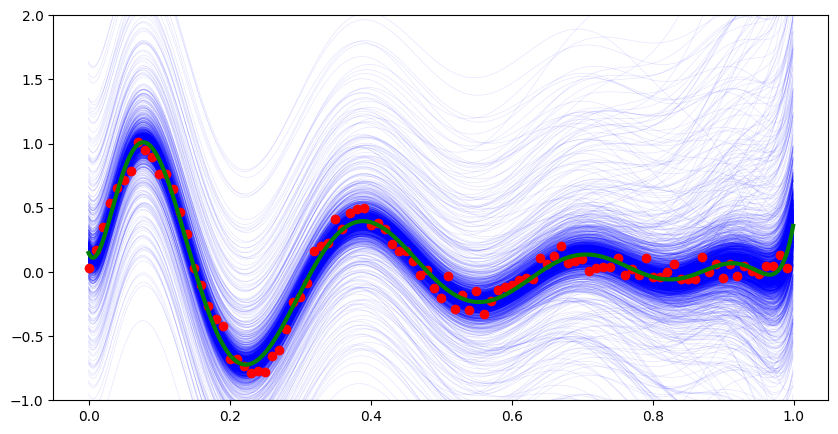

In [8]:
# Визуализация доверительного интервала w_i +- \Delta w_i
# Для зашумлённых данных построим предсказания:
# 1) Модели со средними весами жирным
# 2) Нескольких моделей с весами из доверительного интервала прозрачным

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def create_X(x, m):
    X = np.ones(x.shape) # Сразу же добавим intercept
    for i in range(1, m + 1):
        X = np.concatenate([X, x**i], axis = 1)
    return X

def predict(x, w):
    X_predict = create_X(x, len(w) - 1)
    return X_predict @ w

m = 10

xs = np.arange(0, 1, 0.01).reshape((-1, 1))
noise = np.random.normal(0., 0.05, size = xs.shape[0]).reshape((-1, 1))
ys = np.exp(-5*xs**2)*np.sin(20*xs) + noise

X_train = create_X(xs, m)
w_middle = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ ys

delta_w = np.diagonal(X_train.T @ X_train) * mean_squared_error(ys, predict(xs, w_middle))

plt.figure(figsize=(10, 5))

plt.ylim((-1, 2))


x_vis = np.arange(0, 1, 0.001).reshape((-1, 1))

for i in range(200):
    w = np.random.normal(loc = w_middle ,
                          scale = delta_w)
    plt.plot(x_vis, predict(x_vis, w), lw = 0.5, c = "b", alpha = 0.1)


plt.scatter(xs, ys, c="r", zorder = 3)
plt.plot(x_vis, predict(x_vis, w_middle), lw = 3, c = "g", zorder = 4)

На графике мы видим, что в правой части траектории спутываются, а в левой нет.  Это происходит потому, что

- точки так расположены, что те точки, у которых координата меньше, лучше ложатся на интерполирующий многочлен.

- в многочлене веса умножаются на степени х.  Поэтому чем больше х, тем сильнее возмущаются траектории при возмущении старших весов.

## Домашнее задание


### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

Сравните скорость работы вашей функции со встроенной библиотечной реализацией, как тут [Работа со случайными величинами.](https://miptstats.github.io/courses/python/07_random.html)



In [27]:
import numpy as np
import time

def my_cholesky(A):
    """Разложение Холецкого"""
    n = A.shape[0]
    L = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i + 1):
            s = sum(L[i, k] * L[j, k] for k in range(j))
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - s)
            else:
                L[i, j] = (1.0 / L[j, j] * (A[i, j] - s))
    return L

def cholesky_rand(cov, n=1):
    L = my_cholesky(cov) # Используем свою реализацию
    z = np.random.normal(size=(n, cov.shape[0]))
    return 0 + z @ L.T

# -----------------------------------
cov = np.array([[1.0, 0.5, 0.2],
                [0.5, 1.0, 0.3],
                [0.2, 0.3, 1.0]])
n = 100000

t1 = time.time()
x1 = cholesky_rand(cov, n)
t2 = time.time()

t3 = time.time()
L_lib = np.linalg.cholesky(cov)
x2 = np.random.normal(size=(n, cov.shape[0])) @ L_lib.T
t4 = time.time()

print(f"Время (своя реализация): {t2 - t1:.4f}")
print(f"Время (библиотечная): {t4 - t3:.4f}")

print("Ков. матрица (своя):\n", np.cov(x1.T))
print("Ков. матрица (библиотечная):\n", np.cov(x2.T))

Время (своя реализация): 0.0099
Время (библиотечная): 0.0071
Ков. матрица (своя):
 [[1.00167245 0.5041997  0.20313196]
 [0.5041997  0.99900277 0.30146185]
 [0.20313196 0.30146185 1.00223606]]
Ков. матрица (библиотечная):
 [[1.00032369 0.49910951 0.20535684]
 [0.49910951 1.00157898 0.30331599]
 [0.20535684 0.30331599 1.00548186]]



### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:







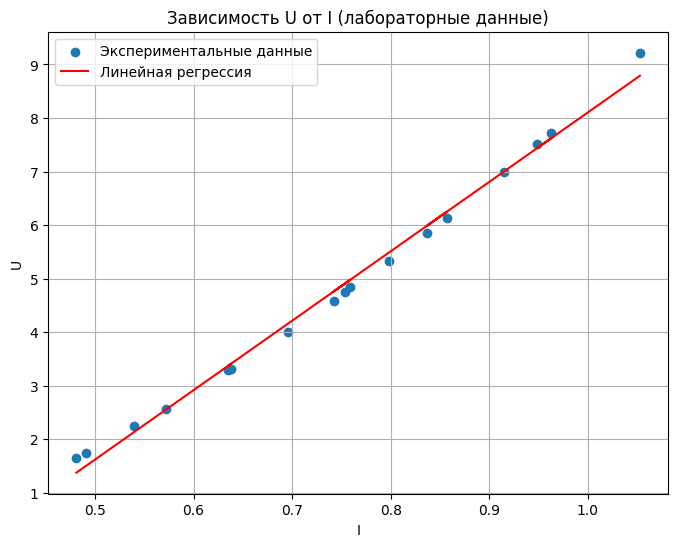

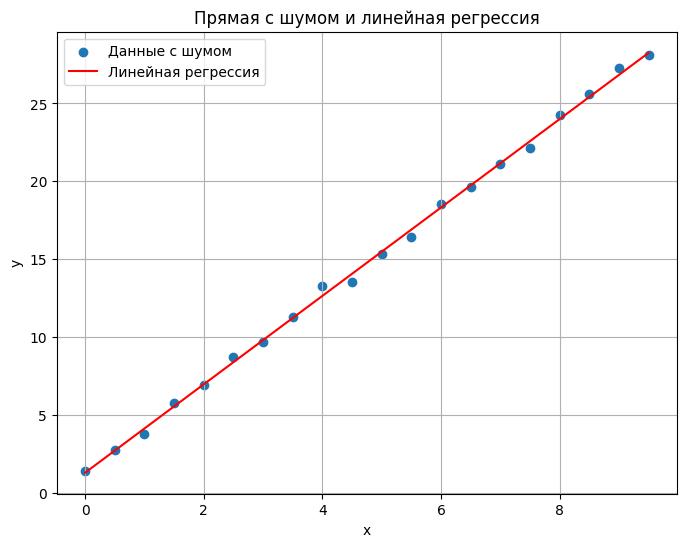

y = a + b*x
Коэффициенты для лабораторных данных:  b = 12.968170248879415, a = -4.8650822797524125
Коэффициенты для данных с шумом: b = 2.8361603533101025, a = 1.307715395503804


In [32]:
# ! pip install openpyxl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# данные из лабораторной работы (пример с зависимостью U от I)
data = pd.read_excel("data.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]


model = LinearRegression()
model.fit(I.values.reshape(-1, 1), U.values.reshape(-1, 1))

U_pred = model.predict(I.values.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(I, U, label="Экспериментальные данные")
plt.plot(I, U_pred, color='red', label="Линейная регрессия")
plt.xlabel("I")
plt.ylabel("U")
plt.title("Зависимость U от I (лабораторные данные)")
plt.legend()
plt.grid(True)
plt.show()


# создание прямой с шумом
true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

model_noise = LinearRegression()
model_noise.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

ys_pred = model_noise.predict(xs.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, label="Данные с шумом")
plt.plot(xs, ys_pred, color='red', label="Линейная регрессия")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Прямая с шумом и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()


print("y = a + b*x")
print(f"Коэффициенты для лабораторных данных:  b = {model.coef_[0][0]}, a = {model.intercept_[0]}")
print(f"Коэффициенты для данных с шумом: b = {model_noise.coef_[0][0]}, a = {model_noise.intercept_[0]}")

Рекомендуется также обратить внимание на функции:  

[np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate)

Join a sequence of arrays along an existing axis.

[np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

Join a sequence of arrays along a new axis.

[np.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html#numpy.vstack)

Stack arrays in sequence vertically (row wise).


[np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.hstack)

Stack arrays in sequence horizontally (column wise).

[np.dstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.dstack)

Stack arrays in sequence depth wise (along third axis).

[np.column_stack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.column_stack)

Stack 1-D arrays as columns into a 2-D array.

[np.row_stack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.row_stack)

Stack 1-D arrays as rows into a 2-D array.

[np.split](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.split)

Split array into a list of multiple sub-arrays of equal size.

[np.vsplit](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.vsplit)

Split an array into multiple sub-arrays vertically (row-wise).

[np.hsplit](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.hsplit)

Split array into multiple sub-arrays horizontally (column-wise).

[np.dsplit](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.dsplit)

Split array into multiple sub-arrays along the 3rd axis (depth).

[np.array_split](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.array_split)

Split an array into multiple sub-arrays of equal or near-equal size. Does not raise an exception if an equal division cannot be made.

[np.block](https://numpy.org/doc/stable/reference/generated/numpy.block.html#numpy.block)

Assemble an nd-array from nested lists of blocks.



### 3. Правдоподобие для гауссовой вероятностной модели.

Пусть дана выборка точек на прямой $\left\{x_i\right\}$.

Максимизируйте правдоподобие (или его логарифм) в гауссовой вероятностной модели:
$$
\prod_i p\left(x_i\right) \rightarrow \max _{\mu, \sigma} \quad p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} .
$$



### 4. Гауссовы интегралы для МНК.  


На лекции обсуждался учет влияния систематической погрешности путем усреднения решения задачи МНК по гауссовому нормальному распределению для $y$-координат точек выборки: $\tilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)$, где погрешность по оси ординат считалась равной $s$. Обобщите этот вывод на случай, когда каждая точка имеет свою $y$-погрешность $s_i$. Для этого проведите усреднение по многомерному нормальному распределению для $\tilde{y}_i$ с произвольной симметричной матрицей ковариации $A^{-1}$ :
$$
\begin{array}{r}
\tilde{y} \sim \frac{1}{(2 \pi)^{N / 2} (\operatorname{det} (A))^{1/2} } \exp \left(-\frac{(\tilde{y}-y)^T A^{-1}(\tilde{y}-y)}{2}\right), \ \ \ \ (1) \\
\text { где } y=\left(\begin{array}{lll}
y_i & \ldots & y_N
\end{array}\right)^T, \text { a } \tilde{y}=\left(\begin{array}{lll}
\tilde{y}_i & \ldots & \tilde{y}_N
\end{array}\right)^T .
\end{array}
$$
1. Покажите, что распределение (1) правильно нормировано. Указание: Выполните замену координат $\tilde{y}-y=S z$, где матрица $S$ диагонализует $A$.
2. Вычислите неприводимые парные корреляторы $\left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle$, усредняя по распределению (1). Указание: Сделайте замену $\tilde{y}-y=Y$. Для вычисления гауссового интеграла с предэкспонентой вычислите интеграл $\int d^N Y \exp \left(-Y^T A^{-1} Y / 2+J^T Y\right)$ и выполните дифференцирование по параметрам $J_i$ (компоненты вектора $J$ ).




### 5. Систематические погрешности в МНК.

Выполните в условиях предыдущей задачи.

1. Оцените систематические погрешности параметров модели $w_\alpha$, следуя вычислению, приведенному на лекции, и используя корреляторы, полученные в предыдущем пункте.
2. Запишите решение в частном случае диагональной матрицы $A=\operatorname{diag}\left(A_1, \ldots, A_N\right)$. Как следует выбирать величины $A_i$ для моделирования $y$-погрешности $i$-ой точки, равной $s_i$ ?


### 6*. Систематические погрешности весов в МНК при учёте погрешностей х-координат.

Выполните оценку погрешности весов $w_\alpha$, учитывая систематическую погрешность $x$-координат точек выборки, усреднив решение задачи МНK по гауссовому нормальному распределению $\tilde{x}_i \sim \mathcal{N}\left(x_i, s_i^2\right)$. Для простоты считайте погрешности для каждой точки равными: $s_i=s$ и пренебрегайте погрешностью $y$-координат.

Указание: разложите аналитическое решение задачи МНK в ряд Тейлора по отклонениям $\tilde{x}_i-x_i$, считая такое разложение допустимым.


